## 4 nodes

In [1]:
%run ../imports.py

In [2]:
G = nx.DiGraph()

In [3]:
G.add_nodes_from([0,1,2,3,4])
G.add_edges_from([
    (0,1),
    (0,2),
    (3,2),
    (2,4)
])

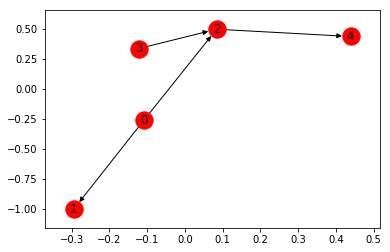

In [4]:
nx.draw_networkx(G)

In [5]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

3

In [6]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [7]:
Q

matrix([[ 7.2566e-01, -3.6283e-01, -5.6658e-01,  1.0187e-01,  1.0187e-01],
        [ 4.7267e-01, -2.3633e-01,  6.0538e-01, -4.2086e-01, -4.2086e-01],
        [-0.0000e+00,  6.7008e-17, -6.7008e-17,  7.0711e-01, -7.0711e-01]])

In [8]:
sigma

array([[ 2.4287e-01, -8.2235e-17,  8.5520e-02],
       [-7.9538e-17,  3.7172e-01,  5.5704e-02],
       [ 8.5520e-02,  5.5704e-02,  1.0000e+00]])

In [9]:
eqL

matrix([[ 1.4400e+00, -7.2000e-01, -4.8000e-01, -2.4000e-01, -7.7922e-17],
        [-7.2000e-01,  3.6000e-01,  2.4000e-01,  1.2000e-01,  9.1114e-17],
        [-4.8000e-01,  2.4000e-01,  1.1600e+00, -4.2000e-01, -5.0000e-01],
        [-2.4000e-01,  1.2000e-01, -4.2000e-01,  5.4000e-01, -2.4782e-16],
        [ 1.6931e-16, -1.4157e-16, -5.0000e-01, -3.3197e-16,  5.0000e-01]])

In [10]:
posG, negG = separate_graphs(eqL)

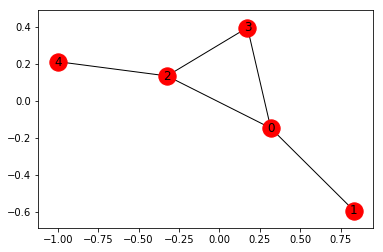

In [12]:
nx.draw_networkx(posG)

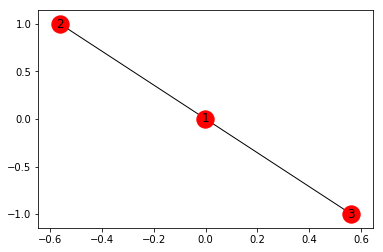

In [13]:
nx.draw_networkx(negG)